In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [56]:
def labelSeason(date):
    month = date.month
    if month in [3, 4, 5]:
        return 0 #'Spring'
    elif month in [6, 7, 8]:
        return 1 #'Summer'
    elif month in [9, 10, 11]:
        return 2 #'Autumn'
    else:
        return 3 #'Winter'

In [57]:
df = pd.read_csv("RRCA_baseflow.csv")
df['Date'] = df['Date'].apply(lambda x: x - 693963)# Number of days since Jan 1, 1900
# Specify a starting date
df['DateYMD'] = pd.to_datetime(df['Date'], origin='1900-01-01', unit='D')
df['Season'] = df['DateYMD'].apply(labelSeason)
df = df[~df["Segment_id"].isin([239, 256])] # Remove these segments with super high observed values
display(df)
display(df['Segment_id'].unique())

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed,DateYMD,Season
0,16769,144,1086190,14476800,0.59,18.99,0.0,0.145161,1945-11-30,2
1,16800,144,1086190,14476800,0.97,29.63,0.0,0.445161,1945-12-31,3
2,16828,144,1086190,14476800,1.34,29.63,0.0,1.332203,1946-01-28,3
3,16859,144,1086190,14476800,1.79,29.63,0.0,2.932203,1946-02-28,3
4,16889,144,1086190,14476800,8.23,29.63,0.0,3.728689,1946-03-30,0
...,...,...,...,...,...,...,...,...,...,...
15586,27847,98,721870,14387040,0.00,0.00,0.0,0.298500,1976-03-30,0
15587,27878,98,721870,14387040,0.00,0.00,0.0,0.211475,1976-04-30,0
15588,27908,98,721870,14387040,0.00,0.00,0.0,0.122951,1976-05-30,0
15589,27939,98,721870,14387040,0.00,0.00,0.0,0.120000,1976-06-30,1


array([144, 154, 176, 171, 152,  55, 118,  65,  64,  63,  40, 135,  53,
       123, 157, 147, 170, 136, 149,  60, 188, 194, 205,  59, 148, 138,
        62,  96, 178, 186, 159, 130,  97,  51, 145, 196, 146, 189,  56,
        98], dtype=int64)

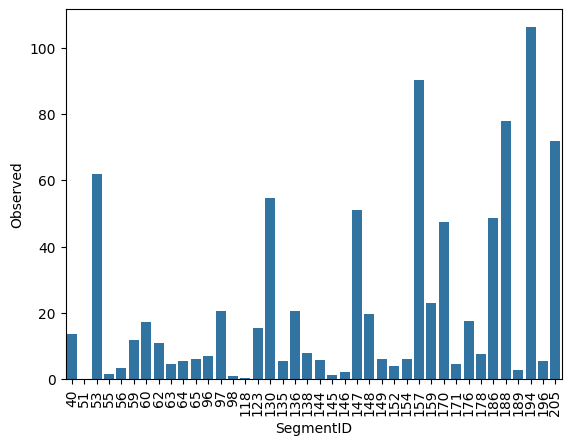

In [66]:
means = df.groupby(['Segment_id']).agg({'Observed': 'mean'}).reset_index()
means.columns = ['SegmentID', 'Observed']
means_plot = sns.barplot(means, x='SegmentID', y='Observed')
means_plot.tick_params(axis='x', rotation=90) # Change the label direction
plt.show()

<Axes: xlabel='Irrigation_pumping', ylabel='Observed'>

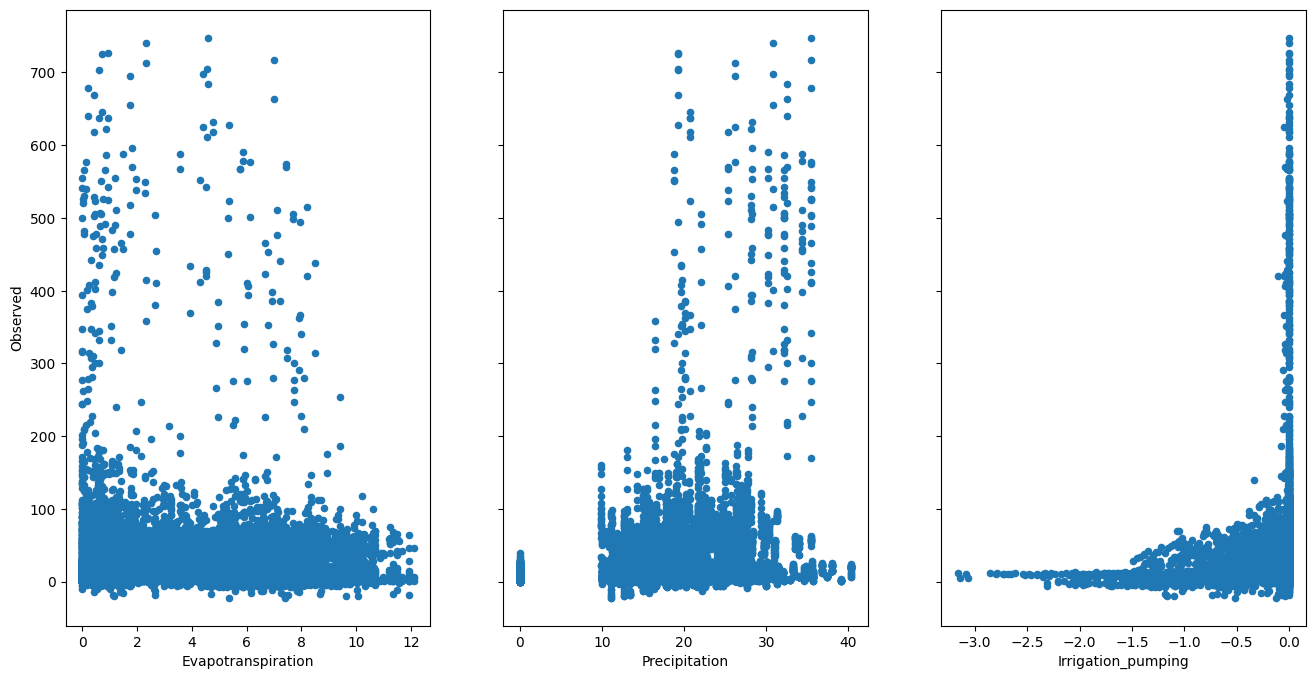

In [40]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='Evapotranspiration', y='Observed', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='Precipitation', y='Observed', ax=axs[1])
df.plot(kind='scatter', x='Irrigation_pumping', y='Observed', ax=axs[2])

<Axes: xlabel='DateYMD'>

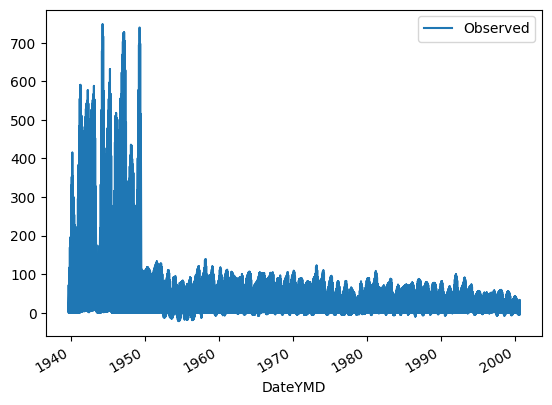

In [23]:
df.plot('DateYMD', 'Observed')

<Axes: xlabel='DateYMD', ylabel='Observed'>

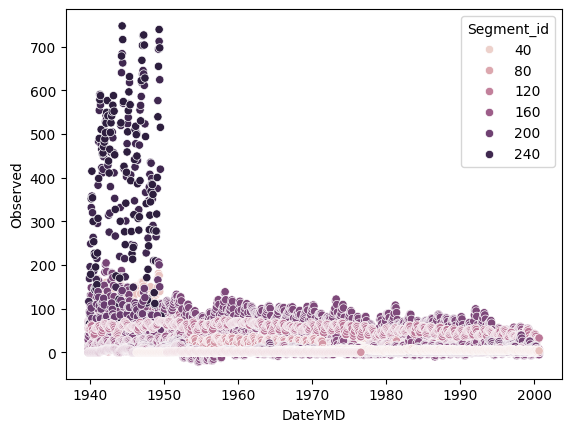

In [26]:
sns.scatterplot(df, x='DateYMD', y='Observed', hue="Segment_id")

In [10]:
display(df[df['Segment_id'] == 239])
display(df[df['Segment_id'] == 256])

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed,DateYMD
6391,14516,239,1630030,14550720,1.96,17.50,0.000000,38.360656,1939-09-30
6392,14546,239,1630030,14550720,1.22,17.50,0.000000,116.360656,1939-10-30
6393,14577,239,1630030,14550720,0.42,17.50,0.000000,169.064520,1939-11-30
6394,14608,239,1630030,14550720,0.00,16.40,0.000000,196.064520,1939-12-31
6395,14637,239,1630030,14550720,0.16,16.40,0.000000,248.733330,1940-01-29
...,...,...,...,...,...,...,...,...,...
6505,17985,239,1630030,14550720,1.73,26.24,0.000000,694.557380,1949-03-30
6506,18016,239,1630030,14550720,2.32,26.24,0.000000,712.557380,1949-04-30
6507,18046,239,1630030,14550720,4.41,26.24,-0.048628,624.540980,1949-05-30
6508,18077,239,1630030,14550720,8.19,26.24,-0.102440,419.540980,1949-06-30


,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed,DateYMD
6510,14516,256,1941550,14524320,1.96,18.90,0.0,13.524590,1939-09-30
6511,14546,256,1941550,14524320,1.22,18.90,0.0,41.024590,1939-10-30
6512,14577,256,1941550,14524320,0.42,18.90,0.0,65.403230,1939-11-30
6513,14608,256,1941550,14524320,0.00,19.80,0.0,86.903230,1939-12-31
6514,14637,256,1941550,14524320,0.16,19.80,0.0,178.733330,1940-01-29
...,...,...,...,...,...,...,...,...,...
6624,17985,256,1941550,14524320,1.73,30.85,0.0,655.172131,1949-03-30
6625,18016,256,1941550,14524320,2.32,30.85,0.0,739.672130,1949-04-30
6626,18046,256,1941550,14524320,4.41,30.85,0.0,697.475410,1949-05-30
6627,18077,256,1941550,14524320,8.19,30.85,0.0,515.475410,1949-06-30


In [65]:
# create X and y
feature_cols = ['Evapotranspiration', 'Precipitation', 'Irrigation_pumping', 'Season']

X = df[feature_cols]
y = df.Observed

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
x = zip(feature_cols, lm.coef_)
for y in x:
    display(y)

('Evapotranspiration', 0.4881993100397792)

('Precipitation', 0.8201896890578506)

('Irrigation_pumping', 11.87536008201602)

('Season', 1.0913920375007387)

In [70]:
lm = smf.ols(formula='Observed ~ Irrigation_pumping', data=df[df['Season'] == 0]).fit()
# print the coefficients
display(lm.params)

# print the confidence intervals for the model coefficients
display(lm.conf_int())

Intercept             20.158556
Irrigation_pumping     4.531960
dtype: float64

,0,1
Intercept,19.263477,21.053635
Irrigation_pumping,-0.647134,9.711055
